Ayse Bilgin - 2019203159, Damla Kayikci - 2020400228, Kerem Yavuz - 2020300303


In [3]:
# import
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

# PART A

## a. Describe each of these features.Discuss how each of these financial ratios may affect credit risk of a company.

### WC/TA
Working Capital / Total Assets: A liquidity measure indicating the proportion of working capital (current assets - current liabilities) relative to total assets.
Companies with higher WC/TA are better able to meet short-term obligations, and thus are less likely to default. They can better endure unexpected expenses and economic downturns.
### RE/TA
Retained Earnings / Total Assets: A profitability measure showing the accumulated retained earnings relative to total assets.
Companies with higher RE/TA are generally more established and have a history of profitability and reinvestment in the business. They are thought to are less likely to default compared to companies with lower RE/TA.
### EBIT/TA
Earnings Before Interest and Taxes / Total ASSETS: A profitability measure indicating operating profitability relative to total assets.
Companies with higher EBIT/TA are more efficient, they generate more profits from their assets. They are less likely to default compared to companies with lower EBIT/TA as they may struggle to cover fixed costs.
### ME/TL
Market Value of Equity / Total Liability: A measure of leverage, indication a company's market capitalization relative to its total liabilities.
Companies with higher ME/TL have lower leverage and greater financial stability compared to companies with lower ME/TL. They are less exposed to risk and unexpected expenses.
### S/TA
Sales / Total Assets: An efficiency measure, showing how effectively a company generates revenue from assets.
A higher S/TA ratio suggest more efficient use of companies' assets. Companies with higher S/TA ratios are less likely to default as they have good utilization of their assets.

### Features and Credit Risk of a Company
The credit risk of a company is determined by that companies capability to pay back its loans rather than defaulting on them. Each measure in a way signals the financial stability, efficiency, and so the capability of that company. So, a firm that has lower risk of defaulting (higher values for each of the features listed here), it will have a lower credit risk and higher credit score.


## b. Run a logistic regression model and briefly comment on both the signs and magnitude of the estimate coefficients.

In [3]:
credit_data_path = "credit.csv"
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.227475
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                  744
Model:                          Logit   Df Residuals:                      738
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.2707
Time:                        17:46:55   Log-Likelihood:                -169.24
converged:                       True   LL-Null:                       -232.05
Covariance Type:            nonrobust   LLR p-value:                 2.031e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0984      0.328     -3.345      0.001      -1.742      -0.455
WC/TA          0.6688      0.

We have calculates that all the measures' coefficients except WC/TA and S/TA is negative. This means that each of these measures are negatively correlated with default. The p-values for RE/TA, ME/TL, and S/TA are very low, suggesting statistical significance. WC/TA and S/TA have >0.05 p-values, suggesting their statistical insignificance. So them having positive coefficients is unimportant. EBIT/TA has the biggest impact on default risk when we look at the magnitude of the correlation. Its coefficient is substantially lower (as it is negative) then the coefficients of RE/TA and ME/TL respectively. (Note: We should keep in mind that EBIT/TA is borderline statistically insignificant, but it does pass the 0.1 test)

## c. Calculate the $R^2$ of the logistic regression and discuss why it is not a appropriate measure for classification problem.
We have already calculated the pseudo-$R^2$ of the regression in the above summary. The pseudo-$R^2$ is $0.2707$, which suggests that our model is explaining ~$27$% of the default risk.

The issue is that for classification problems like logistic regressions, the outcome is binary. And for binary outcomes, pseudo-$R^2$ (and $R^2$ for classic linear regression) is not meaningful. In the later questions we will calculate the confusion matrix and ROC, which are going to suggest much better explaining power for the model. One should use these metrics for classification problems.

## d. By assuming your probability of default benchmark is 50%, evaluate your model’s performance via filling the following truth table.

In [14]:
credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

predictions = logit_model.predict(X)
predicted_classes = (predictions >= 0.5).astype(int)

conf_matrix = confusion_matrix(y, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

print("\nTruth Table")
print("-------------------------------------")
print(f"True Positive (TP): {TP}\tFalse Negative (FN): {FN}")
print(f"False Positive (FP): {FP}\tTrue Negative (TN): {TN}")
print("-------------------------------------")

accuracy = accuracy_score(y, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")


Optimization terminated successfully.
         Current function value: 0.227475
         Iterations 9
Confusion Matrix:
[[667   7]
 [ 61   9]]

Truth Table
-------------------------------------
True Positive (TP): 9	False Negative (FN): 61
False Positive (FP): 7	True Negative (TN): 667
-------------------------------------
Accuracy: 0.91


|                 | Predicted Positive     | Predicted Negative      |
|-----------------|------------------------|-------------------------|
| **Actual Positive** | True Positive (TP): 9  | False Negative (FN): 61 |
| **Actual Negative** | False Positive (FP): 7 | True Negative (TN): 667 |


## d. What can be said about the performance of the model by using the above Truth table?
$Accuracy = \frac{TP + TN}{totalobs} = 0.908$ This means that the model has a ~$91$% predictive power which is very good. This power is nearly totally due to its accuracy in predicting non-defaults. The model struggles to identify defaults effectively, indicated by the high $FN$ count.

## e. Can you calculate the ROC curve statistic for this model?

Optimization terminated successfully.
         Current function value: 0.227475
         Iterations 9
ROC AUC: 0.874


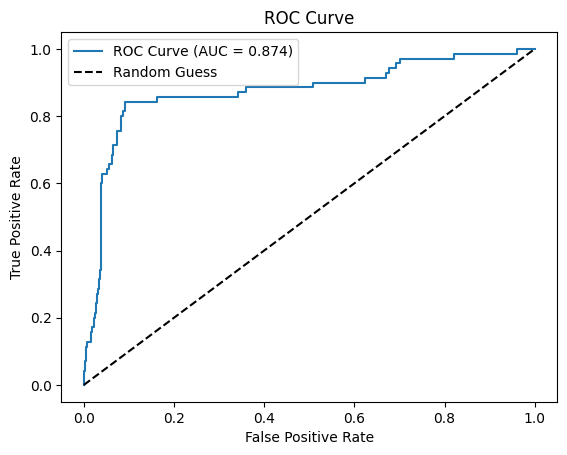

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

predictions = logit_model.predict(X)

roc_auc = roc_auc_score(y, predictions)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y, predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## f. By leaving the last 10% of the sample of the data as a test set, calculate the truth table and ROC curve statistic.

Optimization terminated successfully.
         Current function value: 0.231403
         Iterations 9
Confusion Matrix - Test Set:
[[66  2]
 [ 5  2]]

Truth Table for Test Set
-------------------------------------
|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP): 2    | False Negative (FN): 5   |
| **Actual Negative** | False Positive (FP): 2   | True Negative (TN): 66   |
-------------------------------------
ROC AUC - Test Set: 0.947


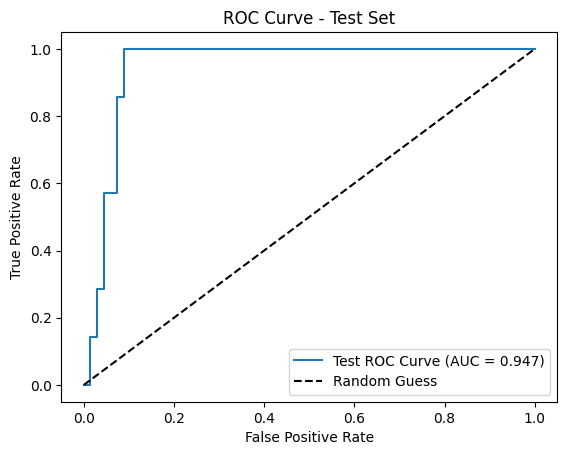

In [18]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

logit_model = sm.Logit(y_train, X_train).fit()

predictions_test = logit_model.predict(X_test)
predicted_classes_test = (predictions_test >= 0.5).astype(int)

conf_matrix_test = confusion_matrix(y_test, predicted_classes_test)
print("Confusion Matrix - Test Set:")
print(conf_matrix_test)

TP = conf_matrix_test[1, 1]
FN = conf_matrix_test[1, 0]
FP = conf_matrix_test[0, 1]
TN = conf_matrix_test[0, 0]

print("\nTruth Table for Test Set")
print("-------------------------------------")
print(f"|                 | Predicted Positive | Predicted Negative |")
print(f"|-----------------|--------------------|--------------------|")
print(f"| **Actual Positive** | True Positive (TP): {TP}    | False Negative (FN): {FN}   |")
print(f"| **Actual Negative** | False Positive (FP): {FP}   | True Negative (TN): {TN}   |")
print("-------------------------------------")

roc_auc_test = roc_auc_score(y_test, predictions_test)
print(f"ROC AUC - Test Set: {roc_auc_test:.3f}")

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predictions_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()


## g. Calculate the ROC statistics of the above model by using LOOCV method and k-fold CV where k=10.

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logit_model = sm.Logit(y_train, X_train).fit(disp=0)
    predictions = logit_model.predict(X_test)

    roc_auc = roc_auc_score(y_test, predictions)
    roc_auc_scores.append(roc_auc)

mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print(f"Mean ROC AUC (10-Fold CV): {mean_roc_auc:.3f}")


Mean ROC AUC (10-Fold CV): 0.873


## h. By using “Best Subset Regression” method as we discussed in the class, which variable combinations out of these 5 variables can be chosen as the best model?

In [20]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import roc_auc_score

credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

X = sm.add_constant(X)

best_combination = None
best_roc_auc = 0

for k in range(1, len(X.columns)):
    for subset in combinations(X.columns[1:], k):  # Exclude the constant term
        X_subset = X[list(subset) + ['const']]
        logit_model = sm.Logit(y, X_subset).fit(disp=0)
        predictions = logit_model.predict(X_subset)
        roc_auc = roc_auc_score(y, predictions)

        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_combination = subset

print(f"Best Subset: {best_combination}")
print(f"Best ROC AUC: {best_roc_auc:.3f}")

Best Subset: ('ME/TL',)
Best ROC AUC: 0.876


## i. Try to improve the predictive power of your model with some nonlinear transformations on the variables (i.e. log or sin or whatever is appropriate).

In [26]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import roc_auc_score

credit_data_path = 'credit.csv'
credit_data = pd.read_csv(credit_data_path)

credit_data = credit_data.drop(columns=['Unnamed: 0'])

X = np.log(credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']] + 1 - credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']].min())
y = credit_data['Default']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

predictions = logit_model.predict(X)
roc_auc = roc_auc_score(y, predictions)

print(f"ROC AUC with Log Transformations: {roc_auc:.3f}")

Optimization terminated successfully.
         Current function value: 0.208911
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                  744
Model:                          Logit   Df Residuals:                      738
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.3302
Time:                        19:00:34   Log-Likelihood:                -155.43
converged:                       True   LL-Null:                       -232.05
Covariance Type:            nonrobust   LLR p-value:                 2.735e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0043      2.466      1.218      0.223      -1.830       7.838
WC/TA          2.8629      1.

This model is marginally better than our original model, but now log(EBIT/TA) is also statistically significant.

# PART B

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error

data_path = 'credit.csv'
credit_data = pd.read_csv(data_path)

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=10, scoring='neg_mean_squared_error')
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=10)
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 9), alphas=np.logspace(-6, 6, 100), cv=10)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)
elastic_net.fit(X_scaled, y)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
ridge_preds = cross_val_predict(ridge, X_scaled, y, cv=kf)
lasso_preds = cross_val_predict(lasso, X_scaled, y, cv=kf)
elastic_net_preds = cross_val_predict(elastic_net, X_scaled, y, cv=kf)

ridge_rmse = root_mean_squared_error(y, ridge_preds)
lasso_rmse = root_mean_squared_error(y, lasso_preds)
elastic_net_rmse = root_mean_squared_error(y, elastic_net_preds)

model_performance = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "RMSE": [ridge_rmse, lasso_rmse, elastic_net_rmse],
    "Best Alpha": [ridge.alpha_, lasso.alpha_, elastic_net.alpha_]
})

print("Model Performance:")
print(model_performance)

Model Performance:
         Model      RMSE  Best Alpha
0        Ridge  0.273401  403.701726
1        Lasso  0.276071    0.000001
2  Elastic Net  0.274507    0.023101


## a. Comment on each of the coefficients.


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

data_path = 'credit.csv'
credit_data = pd.read_csv(data_path)

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=10, scoring='neg_mean_squared_error')
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=10)
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 9), alphas=np.logspace(-6, 6, 100), cv=10)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)
elastic_net.fit(X_scaled, y)

ridge_coefs = pd.Series(ridge.coef_, index=X.columns, name="Ridge")
lasso_coefs = pd.Series(lasso.coef_, index=X.columns, name="Lasso")
elastic_net_coefs = pd.Series(elastic_net.coef_, index=X.columns, name="Elastic Net")

coefficients = pd.concat([ridge_coefs, lasso_coefs, elastic_net_coefs], axis=1)
coefficients["Mean"] = coefficients.mean(axis=1)

print("Model Coefficients:")
print(coefficients)


Model Coefficients:
            Ridge     Lasso  Elastic Net      Mean
WC/TA   -0.005672  0.002685     0.000000 -0.000996
RE/TA   -0.055497 -0.085069    -0.081439 -0.074002
EBIT/TA -0.029703 -0.040018    -0.037184 -0.035635
ME/TL   -0.019106 -0.020544    -0.018936 -0.019528
S/TA     0.018611  0.030658     0.027635  0.025635


### Analysis of Model Coefficients

The coefficients for Ridge, LASSO, and Elastic Net provide insights into the importance and relationships of the features to the target variable (default). Here's a breakdown:

#### 1. WC/TA
   - Ridge: Slightly negative coefficient (-0.005672), indicating a weak inverse relationship.
   - LASSO: Positive coefficient (0.002685), suggesting a weak direct relationship.
   - Elastic Net: Zero coefficient, indicating that Elastic Net considers this feature irrelevant.

#### 2. RE/TA
   - Strongly negative coefficients across all models, especially for LASSO (-0.085069).
   - Indicates that higher retained earnings relative to total assets significantly reduce the likelihood of default.
   - This is the most impactful feature across all models.

#### 3. EBIT/TA
   - Moderately negative coefficients for all models, with LASSO having the largest magnitude (-0.040018).
   - Suggests that higher profitability decreases default risk, though less strongly than retained earnings.

#### 4. ME/TL
   - Consistently negative but smaller coefficients across all models, indicating a weak inverse relationship.
   - Suggests that companies with higher market equity relative to liabilities are slightly less likely to default.

#### 5. S/TA
   - Positive coefficients for all models, with LASSO showing the highest value (0.030658).
   - Indicates that higher sales relative to total assets might slightly increase default risk.

---

### Mean Coefficients
The average coefficients across the models give a balanced view:
- RE/TA and EBIT/TA are the most significant predictors, both negatively correlated with default.
- S/TA has a positive mean coefficient, but its effect is weaker compared to **RE/TA** and **EBIT/TA**.
- WC/TA is largely insignificant, especially with Elastic Net setting it to zero.

---

### Summary:
1. Features:
   - RE/TA is the most critical feature for predicting default risk, consistently showing strong negative coefficients.
   - EBIT/TA and ME/TL have moderate but consistent effects.
   - S/TA has a small positive influence on default risk.
   - WC/TA is mostly irrelevant.

2. Models:
   - Ridge keeps all features and applies minimal shrinkage, retaining weak effects for WC/TA.
   - LASSO emphasizes sparsity and assigns a zero coefficient to WC/TA in Elastic Net's case.
   - Elastic Net balances Ridge and LASSO, effectively zeroing out WC/TA while retaining the structure of other features.

## b. Calculate the truth table statistics for the k-fold cross validation method for k=10.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

data_path = 'credit.csv'
credit_data = pd.read_csv(data_path)

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=10, scoring='neg_mean_squared_error')
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=10)
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 9), alphas=np.logspace(-6, 6, 100), cv=10)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)
elastic_net.fit(X_scaled, y)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

ridge_preds = cross_val_predict(ridge, X_scaled, y, cv=kf, method='predict')
lasso_preds = cross_val_predict(lasso, X_scaled, y, cv=kf, method='predict')
elastic_net_preds = cross_val_predict(elastic_net, X_scaled, y, cv=kf, method='predict')

ridge_preds_binary = (ridge_preds >= 0.5).astype(int)
lasso_preds_binary = (lasso_preds >= 0.5).astype(int)
elastic_net_preds_binary = (elastic_net_preds >= 0.5).astype(int)

ridge_cm = confusion_matrix(y, ridge_preds_binary)
ridge_accuracy = accuracy_score(y, ridge_preds_binary)
ridge_precision = precision_score(y, ridge_preds_binary)
ridge_recall = recall_score(y, ridge_preds_binary)
ridge_f1 = f1_score(y, ridge_preds_binary)

lasso_cm = confusion_matrix(y, lasso_preds_binary)
lasso_accuracy = accuracy_score(y, lasso_preds_binary)
lasso_precision = precision_score(y, lasso_preds_binary)
lasso_recall = recall_score(y, lasso_preds_binary)
lasso_f1 = f1_score(y, lasso_preds_binary)

elastic_net_cm = confusion_matrix(y, elastic_net_preds_binary)
elastic_net_accuracy = accuracy_score(y, elastic_net_preds_binary)
elastic_net_precision = precision_score(y, elastic_net_preds_binary)
elastic_net_recall = recall_score(y, elastic_net_preds_binary)
elastic_net_f1 = f1_score(y, elastic_net_preds_binary)

truth_table_stats = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "Accuracy": [ridge_accuracy, lasso_accuracy, elastic_net_accuracy],
    "Precision": [ridge_precision, lasso_precision, elastic_net_precision],
    "Recall": [ridge_recall, lasso_recall, elastic_net_recall],
    "F1 Score": [ridge_f1, lasso_f1, elastic_net_f1]
})

print("Truth Table Statistics:")
print(truth_table_stats)
print("\nConfusion Matrices:")
print("Ridge:\n", ridge_cm)
print("Lasso:\n", lasso_cm)
print("Elastic Net:\n", elastic_net_cm)

Truth Table Statistics:
         Model  Accuracy  Precision    Recall  F1 Score
0        Ridge  0.904570   0.333333  0.014286  0.027397
1        Lasso  0.903226   0.375000  0.042857  0.076923
2  Elastic Net  0.903226   0.333333  0.028571  0.052632

Confusion Matrices:
Ridge:
 [[672   2]
 [ 69   1]]
Lasso:
 [[669   5]
 [ 67   3]]
Elastic Net:
 [[670   4]
 [ 68   2]]


## c. Calculate ROC curve for each of the 3 models by using only in sample methods.

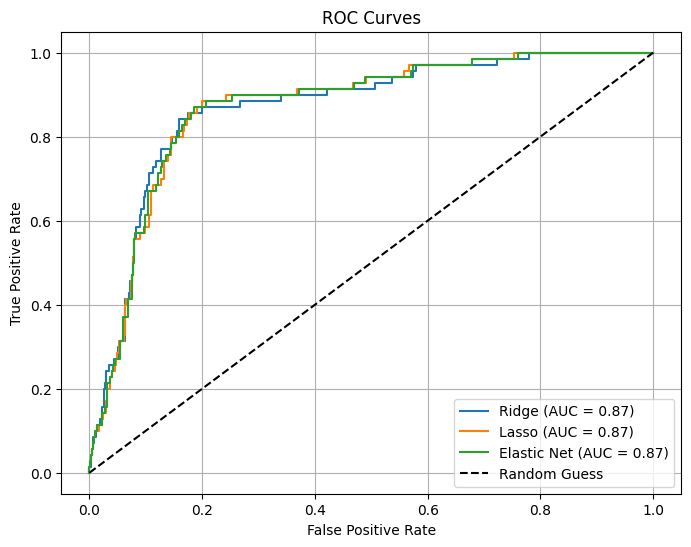

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data_path = 'credit.csv'
credit_data = pd.read_csv(data_path)

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=10, scoring='neg_mean_squared_error')
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=10)
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 9), alphas=np.logspace(-6, 6, 100), cv=10)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)
elastic_net.fit(X_scaled, y)

ridge_preds = ridge.predict(X_scaled)
lasso_preds = lasso.predict(X_scaled)
elastic_net_preds = elastic_net.predict(X_scaled)

ridge_fpr, ridge_tpr, _ = roc_curve(y, ridge_preds)
ridge_auc = auc(ridge_fpr, ridge_tpr)

lasso_fpr, lasso_tpr, _ = roc_curve(y, lasso_preds)
lasso_auc = auc(lasso_fpr, lasso_tpr)

elastic_net_fpr, elastic_net_tpr, _ = roc_curve(y, elastic_net_preds)
elastic_net_auc = auc(elastic_net_fpr, elastic_net_tpr)

plt.figure(figsize=(8, 6))
plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge (AUC = {ridge_auc:.2f})')
plt.plot(lasso_fpr, lasso_tpr, label=f'Lasso (AUC = {lasso_auc:.2f})')
plt.plot(elastic_net_fpr, elastic_net_tpr, label=f'Elastic Net (AUC = {elastic_net_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


## d. After fixing the tuning parameter, use cross validation method to choose which of the 3 regularization method fare best in terms of ROC.

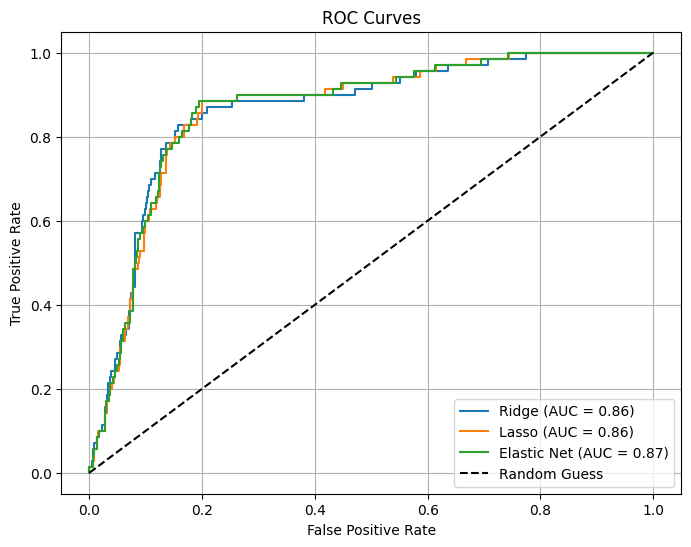

AUC Results:
         Model       AUC
0        Ridge  0.864074
1        Lasso  0.864498
2  Elastic Net  0.865939


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data_path = 'credit.csv'
credit_data = pd.read_csv(data_path)

X = credit_data[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y = credit_data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=10, scoring='neg_mean_squared_error')
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=10)
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 9), alphas=np.logspace(-6, 6, 100), cv=10)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)
elastic_net.fit(X_scaled, y)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
ridge_preds = cross_val_predict(ridge, X_scaled, y, cv=kf, method='predict')
lasso_preds = cross_val_predict(lasso, X_scaled, y, cv=kf, method='predict')
elastic_net_preds = cross_val_predict(elastic_net, X_scaled, y, cv=kf, method='predict')

ridge_fpr, ridge_tpr, _ = roc_curve(y, ridge_preds)
ridge_auc = auc(ridge_fpr, ridge_tpr)

lasso_fpr, lasso_tpr, _ = roc_curve(y, lasso_preds)
lasso_auc = auc(lasso_fpr, lasso_tpr)

elastic_net_fpr, elastic_net_tpr, _ = roc_curve(y, elastic_net_preds)
elastic_net_auc = auc(elastic_net_fpr, elastic_net_tpr)

plt.figure(figsize=(8, 6))
plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge (AUC = {ridge_auc:.2f})')
plt.plot(lasso_fpr, lasso_tpr, label=f'Lasso (AUC = {lasso_auc:.2f})')
plt.plot(elastic_net_fpr, elastic_net_tpr, label=f'Elastic Net (AUC = {elastic_net_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid()
plt.show()

auc_results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "AUC": [ridge_auc, lasso_auc, elastic_net_auc]
})
print("AUC Results:")
print(auc_results)


Elastic net achieves the highest AUC, suggesting that it is the best model balancing sensitivity and specificity. Ridge and LASSO are very similar. Elastic Net's very slight improvement may come from its ability to combine Ridge and LASSO penalties effectively.

# PART C

## As we did in the lectures please redo the PCA on the Turkish Treasury Yield Curve.

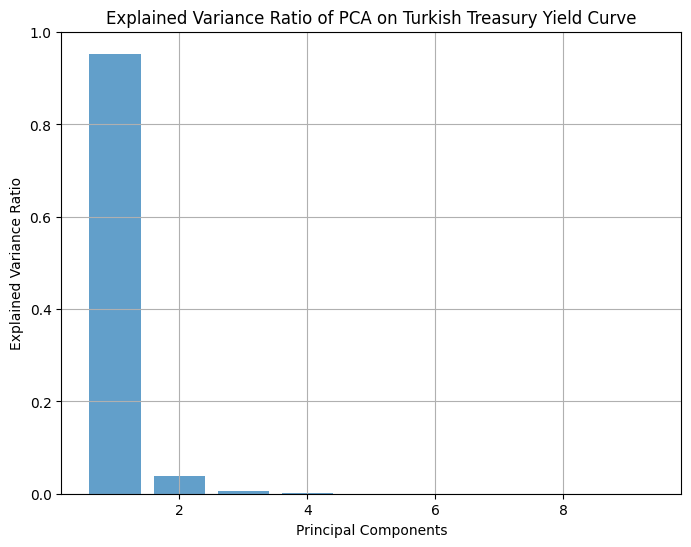

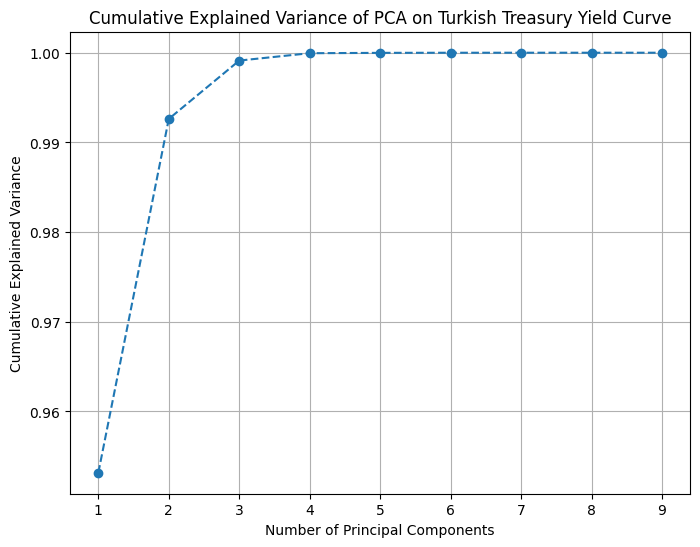

Explained Variance Ratio for Each Principal Component:
  Principal Component  Explained Variance Ratio
0                 PC1              9.531618e-01
1                 PC2              3.945698e-02
2                 PC3              6.505518e-03
3                 PC4              8.220344e-04
4                 PC5              3.847856e-05
5                 PC6              1.253058e-05
6                 PC7              2.147411e-06
7                 PC8              3.783303e-07
8                 PC9              1.186919e-07


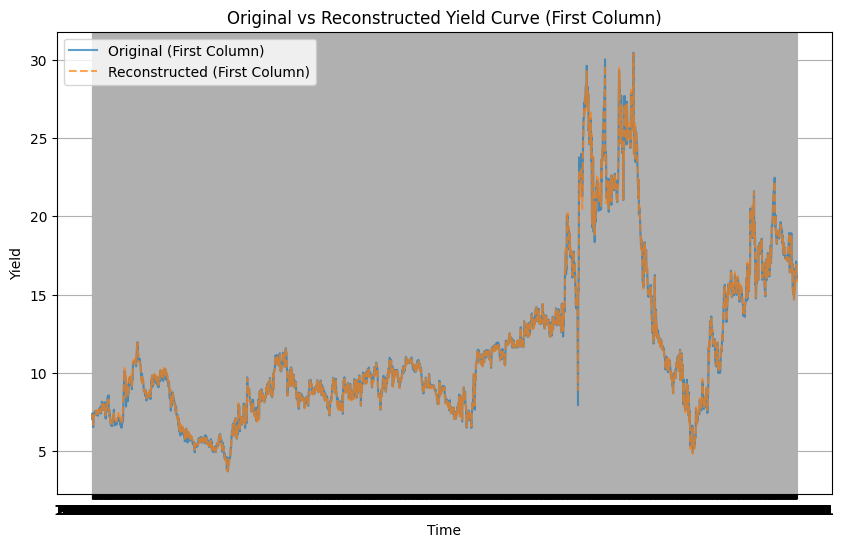

Reconstructed Yield Data (First 5 Rows):
                 X30       X90      X180      X360      X720     X1080  \
4.05.2011   7.366231  7.621111  7.920162  8.318211  8.735620  8.967598   
5.05.2011   7.136870  7.441818  7.802264  8.279778  8.756068  9.001259   
6.05.2011   7.328401  7.566233  7.845536  8.222563  8.639269  8.886712   
9.05.2011   7.318754  7.553644  7.829136  8.200685  8.612114  8.857232   
10.05.2011  6.666369  7.066791  7.545600  8.180806  8.787425  9.075712   

               X1800     X2520     X3600  
4.05.2011   9.268578  9.463212  9.674266  
5.05.2011   9.292056  9.457670  9.613000  
6.05.2011   9.225327  9.455976  9.716449  
9.05.2011   9.194389  9.425824  9.689301  
10.05.2011  9.376418  9.507687  9.579450  
Descriptive Statistics for Levels:
               X30          X90         X180         X360         X720  \
count  2659.000000  2659.000000  2659.000000  2659.000000  2659.000000   
mean     11.555316    11.689976    11.834735    11.989251    12.043765   

In [33]:
from sklearn.decomposition import PCA

data_path = 'turkish_yields.csv'
yield_data = pd.read_csv(data_path, index_col=0)

pca = PCA()
principal_components = pca.fit_transform(yield_data)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PCA on Turkish Treasury Yield Curve')
plt.grid()
plt.show()

cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of PCA on Turkish Treasury Yield Curve')
plt.grid()
plt.show()

explained_variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "Explained Variance Ratio": explained_variance_ratio
})
print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_df)

num_components = 3
pca_selected = PCA(n_components=num_components)
principal_components_selected = pca_selected.fit_transform(yield_data)
reconstructed_data = pca_selected.inverse_transform(principal_components_selected)

reconstructed_df = pd.DataFrame(reconstructed_data, columns=yield_data.columns, index=yield_data.index)

plt.figure(figsize=(10, 6))
plt.plot(yield_data.iloc[:, 0], label='Original (First Column)', linestyle='-', alpha=0.7)
plt.plot(reconstructed_df.iloc[:, 0], label='Reconstructed (First Column)', linestyle='--', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Yield')
plt.title('Original vs Reconstructed Yield Curve (First Column)')
plt.legend()
plt.grid()
plt.show()

print("Reconstructed Yield Data (First 5 Rows):")
print(reconstructed_df.head())

descriptive_stats_levels = yield_data.describe()
skewness_levels = yield_data.skew()
kurtosis_levels = yield_data.kurtosis()
yield_diff = yield_data.diff().dropna()
descriptive_stats_diff = yield_diff.describe()
skewness_diff = yield_diff.skew()
kurtosis_diff = yield_diff.kurtosis()

print("Descriptive Statistics for Levels:")
print(descriptive_stats_levels)
print("Skewness for Levels:")
print(skewness_levels)
print("Kurtosis for Levels:")
print(kurtosis_levels)

print("\nDescriptive Statistics for Differences (r(t) - r(t-1)):")
print(descriptive_stats_diff)
print("Skewness for Differences:")
print(skewness_diff)
print("Kurtosis for Differences:")
print(kurtosis_diff)

## a. Make a descriptive analysis on the Turkish local interest rates as for levels and differences (r(t)-r(t-1) (i.e. mean, median, skewness, kurtosis)

In [15]:
import pandas as pd

data = pd.read_csv('turkish_yields.csv')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], format='%d.%m.%Y')

def descriptive_analysis(data, columns):
    return data[columns].describe().T.assign(
        skewness=data[columns].skew(),
        kurtosis=data[columns].kurt()
    )

differences = data[['X30', 'X90', 'X180', 'X360', 'X720', 'X1080', 'X1800', 'X2520', 'X3600']].diff()
columns = ['X30', 'X90', 'X180', 'X360', 'X720', 'X1080', 'X1800', 'X2520', 'X3600']

level_stats = descriptive_analysis(data, columns)
difference_stats = descriptive_analysis(differences, columns)

print("Descriptive Analysis for Levels:")
print(level_stats)
print("\nDescriptive Analysis for Differences:")
print(difference_stats)

Descriptive Analysis for Levels:
        count       mean       std     min       25%        50%        75%  \
X30    2659.0  11.555316  5.090165  3.7090  8.297123   9.908400  13.378012   
X90    2659.0  11.689976  4.962308  3.9217  8.412450  10.019200  13.566714   
X180   2659.0  11.834735  4.832621  4.2143  8.603300  10.160200  13.739037   
X360   2659.0  11.989251  4.682574  4.5019  8.796650  10.465200  13.901249   
X720   2659.0  12.043765  4.457020  4.9326  9.121300  10.777800  13.973995   
X1080  2659.0  11.993279  4.252555  5.2385  9.233600  10.896400  13.936496   
X1800  2659.0  11.849195  3.888416  5.7030  9.295850  10.770100  13.521024   
X2520  2659.0  11.710016  3.564807  6.0155  9.373950  10.604226  13.282123   
X3600  2659.0  11.530420  3.158489  5.7674  9.396300  10.476800  13.301136   

             max  skewness  kurtosis  
X30    30.444690  1.340615  1.340382  
X90    29.088428  1.294036  1.149661  
X180   28.449142  1.240229  0.962987  
X360   27.780526  1.193060  0.

## b. Calculate how many months (out of 111) 10 year and 2 year yields are positive.


I do not understand what out of 111 means, as the data clearly has more data points.

In [22]:
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], format='%d.%m.%Y')
data['Month'] = data['Unnamed: 0'].dt.to_period('M')
monthly_data = data.groupby('Month').mean()

def analyze_positive_curve(data, long_term_col, short_term_col):
    data['Spread'] = data[long_term_col] - data[short_term_col]
    positive_months = data[data['Spread'] > 0]
    return positive_months

positive_months = analyze_positive_curve(monthly_data, 'X3600', 'X720')

print(f"Number of months where the yield curve is positive: {len(positive_months)}")
print("Positive months:")
print(positive_months[['Spread']])


Number of months where the yield curve is positive: 58
Positive months:
           Spread
Month            
2011-05  0.754168
2011-06  0.475200
2011-07  0.768019
2011-08  1.160000
2011-09  1.581638
2011-10  1.070757
2012-02  0.341229
2012-03  0.334582
2012-04  0.277485
2012-07  0.489300
2012-08  0.683915
2012-09  1.000690
2012-10  0.990000
2012-11  1.230918
2012-12  0.811629
2013-01  0.736359
2013-02  1.333400
2013-03  1.111071
2013-04  1.048976
2013-05  1.129264
2013-06  0.611560
2013-08  0.089547
2013-09  0.706319
2013-10  0.869906
2013-11  0.424210
2013-12  0.498800
2014-04  0.231652
2014-05  0.353890
2014-06  0.753086
2014-07  0.799785
2014-08  0.255657
2014-09  0.188032
2014-10  0.036435
2014-11  0.329540
2014-12  0.012004
2016-04  0.080152
2016-05  0.324771
2016-06  0.493873
2016-07  0.570700
2016-08  0.684741
2016-09  0.911950
2016-10  1.122829
2016-11  0.721459
2016-12  0.440905
2017-01  0.052632
2019-11  0.302856
2019-12  0.519887
2020-01  0.352332
2020-02  0.114595
2020-03  0

## c. Find at least three periods where the yield curve is flattened. Describe what type of bond trading strategies can be developed for these periods.

In [25]:
monthly_data = data.groupby('Month').mean()
def analyze_flattening(data, long_term_col, short_term_col):

    data['Spread'] = data[long_term_col] - data[short_term_col]

    flattened_months = data[(data['Spread'] >= -0.1) & (data['Spread'] <= 0.1)] #0.1 taken as exogenous for "flatness"
    return flattened_months

flattened_months = analyze_flattening(monthly_data, 'X3600', 'X720')

print(f"Number of months where the yield curve is flattened: {len(flattened_months)}")
print("Flattened months:")
print(flattened_months[['Spread']])

Number of months where the yield curve is flattened: 8
Flattened months:
           Spread
Month            
2013-07 -0.010796
2013-08  0.089547
2014-10  0.036435
2014-12  0.012004
2015-01 -0.022300
2016-01 -0.079110
2016-04  0.080152
2017-01  0.052632


### Bond Trading Strategy:
* Implement a bond laddering strategy (buy bonds with differing maturities) to diversify interest rate risk.
* Short-term bonds are less sensitive to interest rate changes, and may provide stability.
* If a convergence of rates is speculated, shorting long-term bonds or using interest rate swaps may be useful.


## d. Find some periods where the yield curve steepens. What does this imply in terms of bond trading?

In [28]:
def analyze_steepening(data, long_term_col, short_term_col):
    data['Spread'] = data[long_term_col] - data[short_term_col]
    data['Spread_Change'] = data['Spread'].diff()
    steepening_months = data[data['Spread_Change'] > 0.2]  #0.2 taken as exogenous for "steepness"
    return steepening_months

steepening_months = analyze_steepening(monthly_data, 'X3600', 'X720')

print(f"\nNumber of months where the yield curve steepens: {len(steepening_months)}")
print("Steepening months:")
print(steepening_months[['Spread', 'Spread_Change']])



Number of months where the yield curve steepens: 38
Steepening months:
           Spread  Spread_Change
Month                           
2011-07  0.768019       0.292819
2011-08  1.160000       0.391981
2011-09  1.581638       0.421638
2012-02  0.341229       1.819588
2012-07  0.489300       0.622419
2012-09  1.000690       0.316775
2012-11  1.230918       0.240918
2013-02  1.333400       0.597041
2013-09  0.706319       0.616772
2014-03 -0.330452       0.433533
2014-04  0.231652       0.562105
2014-06  0.753086       0.399196
2014-11  0.329540       0.293105
2015-10 -0.539838       0.242962
2016-01 -0.079110       0.388025
2016-03 -0.109783       0.219560
2016-05  0.324771       0.244619
2016-09  0.911950       0.227209
2016-10  1.122829       0.210879
2018-02 -1.296535       0.356865
2018-11 -4.529128       4.371963
2018-12 -3.546259       0.982869
2019-01 -2.922683       0.623576
2019-03 -2.626175       0.936314
2019-06 -4.774349       2.246955
2019-07 -1.801979       2.972369
2019

### Bond Trading Strategy: (If steepness is upwards)
* Shift investments to long-term bonds to benefit from higher yields.
* Avoid short-term bonds as they become relatively less favorable.

If steepness is downwards, do the opposite of the recommendations above.

## e.


PCA Analysis for 2013:
Explained Variance Ratios: [9.74643128e-01 1.98232609e-02 4.57342703e-03 8.70641513e-04
 8.70082615e-05 1.93884605e-06 3.85189225e-07 1.99371701e-07
 1.05622794e-08]


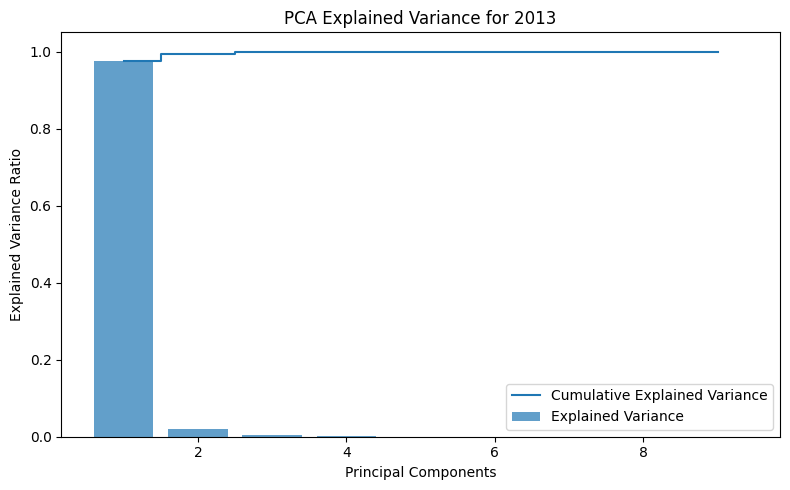

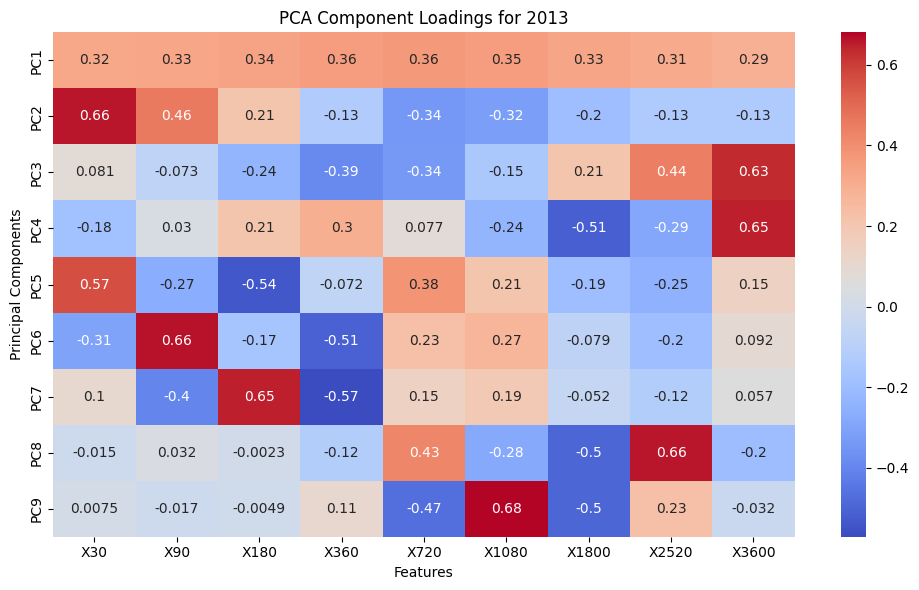


PCA Analysis for 2018:
Explained Variance Ratios: [9.04039326e-01 8.42081181e-02 7.21479606e-03 4.45823422e-03
 6.34558437e-05 1.49708539e-05 7.86496789e-07 2.86277957e-07
 2.65299449e-08]


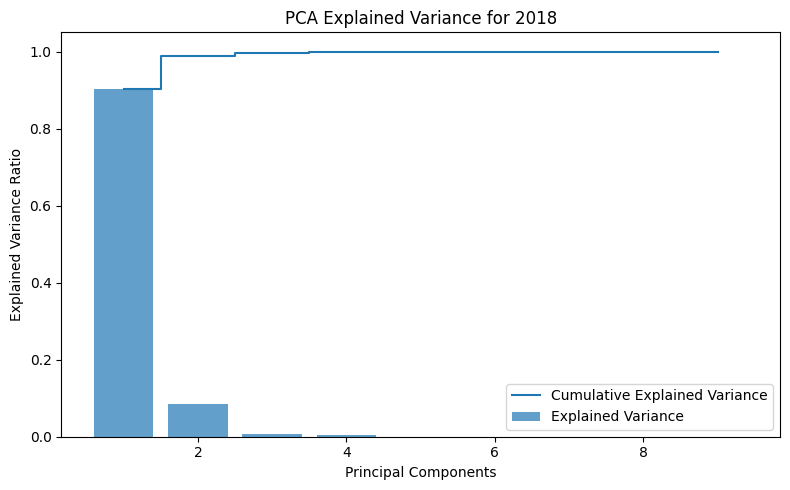

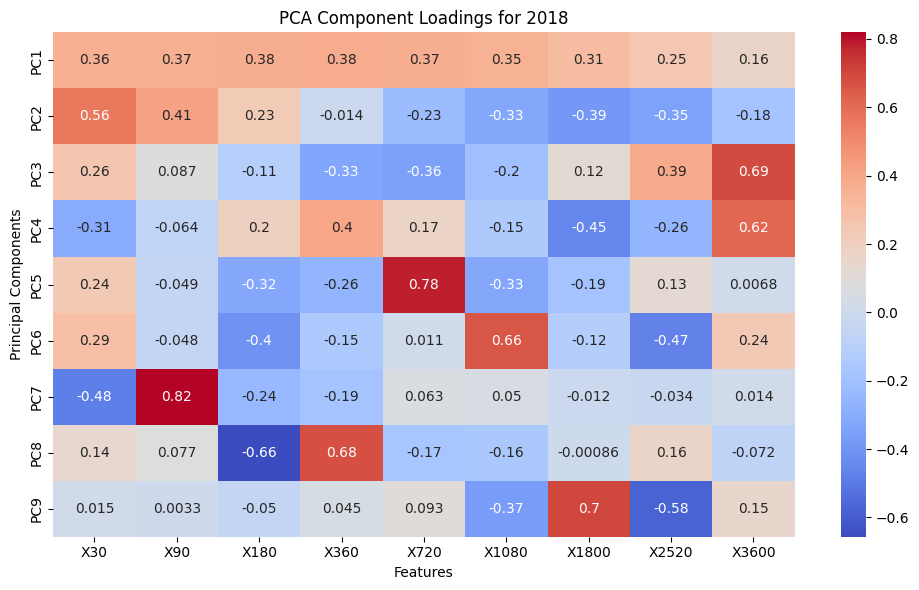


PCA Analysis for 2019:
Explained Variance Ratios: [9.53399773e-01 3.69113363e-02 7.88549983e-03 1.77574119e-03
 2.13708137e-05 5.15220999e-06 8.53588908e-07 2.41087128e-07
 3.22139998e-08]


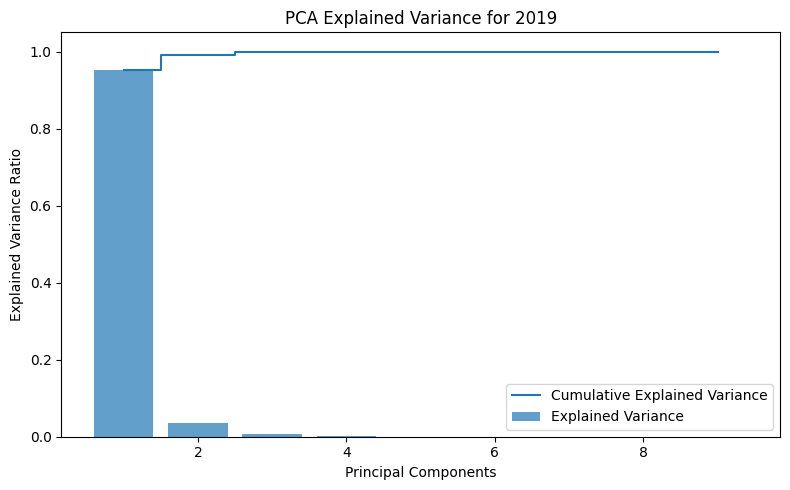

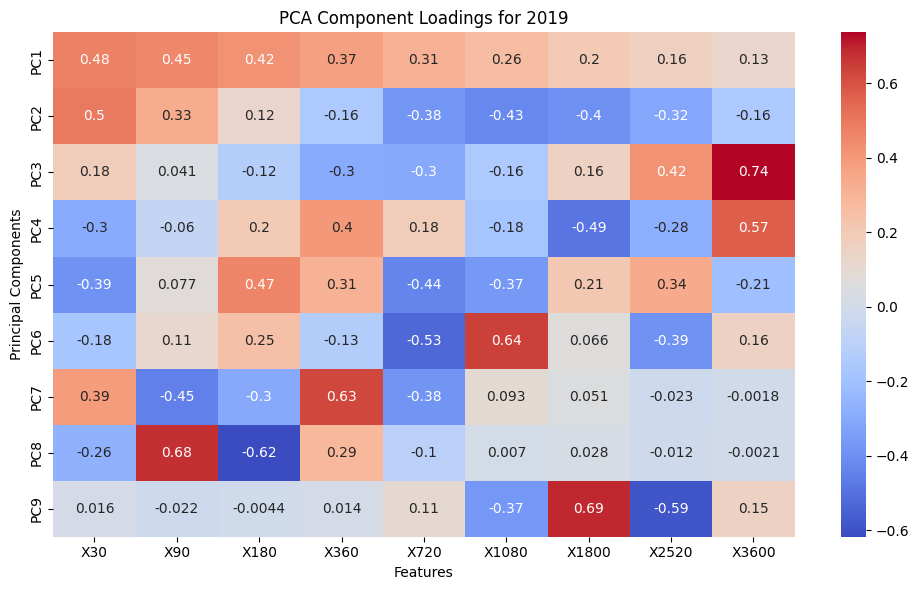

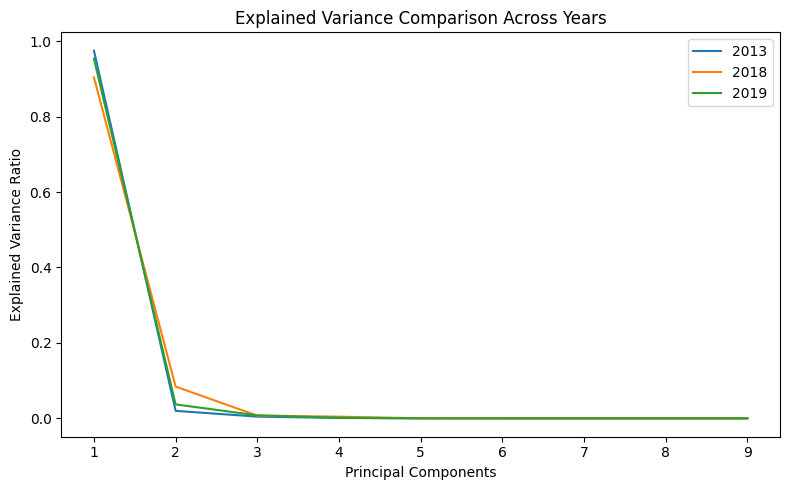

In [36]:
import seaborn as sns

data = pd.read_csv('turkish_yields.csv')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], format='%d.%m.%Y')

def filter_data_by_year(data, year):
    return data[data['Unnamed: 0'].dt.year == year]

def perform_pca(data, columns):
    pca = PCA()
    transformed_data = pca.fit_transform(data[columns])
    explained_variance = pca.explained_variance_ratio_
    return explained_variance, pca.components_

def plot_explained_variance(year, explained_variance):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Explained Variance')
    plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'PCA Explained Variance for {year}')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def plot_pca_components_heatmap(components, year):
    plt.figure(figsize=(10, 6))
    sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=columns, yticklabels=[f'PC{i+1}' for i in range(len(components))])
    plt.title(f'PCA Component Loadings for {year}')
    plt.xlabel('Features')
    plt.ylabel('Principal Components')
    plt.tight_layout()
    plt.show()

columns = ['X30', 'X90', 'X180', 'X360', 'X720', 'X1080', 'X1800', 'X2520', 'X3600']

years = [2013, 2018, 2019]
results = {}

for year in years:
    year_data = filter_data_by_year(data, year)
    if not year_data.empty:
        explained_variance, components = perform_pca(year_data, columns)
        results[year] = {'explained_variance': explained_variance, 'components': components}
        print(f"\nPCA Analysis for {year}:")
        print(f"Explained Variance Ratios: {explained_variance}")
        plot_explained_variance(year, explained_variance)
        plot_pca_components_heatmap(components, year)

plt.figure(figsize=(8, 5))
for year in years:
    if year in results:
        plt.plot(range(1, len(results[year]['explained_variance']) + 1), results[year]['explained_variance'], label=f'{year}')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Comparison Across Years')
plt.legend()
plt.tight_layout()
plt.show()


### Analysis of PCs:
1. Explained Variance Ratios Across Years:
   - 2013: The first principal component (PC1) explains ~97.46% of the variance, indicating a highly dominant structure.
   - 2018: PC1 explains ~90.4%, and the second component (PC2) explains ~8.42%. This suggests a more distributed variance compared to 2013, indicating changes in the yield curve dynamics.
   - 2019: PC1 explains ~95.34%, with PC2 contributing ~3.69%. This suggests a slight re-centralization of the variance but not as much as in 2013.

2. Structural Changes (PCA Loadings):
   - In 2013, PC1 has relatively equal loadings across all maturities, showing a uniform shift in the yield curve.
   - In 2018, PC1 has more unequal loadings (e.g., long-term maturities like `X2520` and `X3600` have higher influence). This indicates the yield curve's movements are more influenced by longer-term rates.
   - In 2019, PC1 again shows slightly more uniform loadings, but PC2 highlights changes in mid-term maturities (e.g., `X720` and `X1080`).

3. **Visual Observations**:
   - The heatmaps reveal that PC2 and PC3 gain importance in 2018, showing structural shifts in the yield curve dynamics during this period.
   - The bar chart comparing explained variance across years highlights that the dominance of PC1 in 2018 is lower than in other years, reflecting broader market influences.

### Possible Economic Interpretations:
- 2013: A highly stable yield curve structure with little variability across maturities.
- 2018: A more volatile environment, possibly due to external or internal economic shocks affecting longer-term rates. (Brunson Crisis)
- 2019: A slight return to stability, though with lingering impacts from 2018.

# PART D Neural Net


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test, model_name):
    # Predict probabilities for training and test sets
    y_train_pred = model.predict(X_train).ravel()
    y_test_pred = model.predict(X_test).ravel()
    
    # Calculate ROC curve and AUC for the training data
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)
    
    # Calculate ROC curve and AUC for the test data
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)
    
    # Plot ROC Curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.4f}', linestyle='--')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.4f}')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    return auc_train, auc_test

# Load the dataset
data = pd.read_csv('Logit1.csv')
X = data[['WCTA', 'RETA', 'EBITTA', 'METL', 'STA']].values  # Select feature columns
y = data['default'].values  # Target variable
'''X:
    [[ 0.501  0.307  0.043  0.956  0.335]
    [ 0.55   0.32   0.05   1.06   0.33 ]
    [ 0.45   0.23   0.03   0.8    0.25 ]
    ...
    [ 0.01  -0.26   0.04   0.3    0.15 ]
    [-0.99  -0.43   0.     0.04   0.33 ]
    [ 0.07  -0.11   0.04   0.04   0.12 ]]
    
    Y:
    [0 0 0 ... 1 1 1]'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_and_train_model(neurons_per_layer, num_layers, epochs=50):
    
    # Build the model
    model = Sequential()
    for i in range(num_layers):
        if i == 0:  # Input layer
            # Input(shape=(5,)) specifies that the input data has 5 features
            model.add(Input(shape=(X.shape[1],)))
        else:  # Hidden layers
            model.add(Dense(neurons_per_layer, activation='relu'))
    # Output layer, binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
      
    return model



# Model configurations 
configs = [
    (2, 5),     # 2 layers, 5 neurons
    (2, 10),    # 2 layers, 10 neurons
    (2, 50),    # 2 layers, 50 neurons
    (2, 200),   # 2 layers, 200 neurons
    (3, 50)     # 3 layers, 50 neurons
]
models = []
auc_scores = []
# Train models for all configurations
for num_layers, neurons in configs:
    print(f"\nTraining model with {num_layers} layers and {neurons} neurons per layer")
    model = build_and_train_model(neurons, num_layers)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    auc_train, auc_test = plot_roc_curve(model, X_train, y_train, X_test, y_test, model_name=f'Neural Network ({num_layers} layers, {neurons} neurons)')
    print(f"Train AUC: {auc_train:.4f}, Test AUC: {auc_test:.4f}")
    auc_scores.append([auc_train, auc_test])
    models.append(model)



##### c) 
Comparing the 5 models we see that the model with 3 layers and 50 neurons per layer and the model with 2 layers and 200 neurons per layer give similar AUC scores for both Training and Test data

In [12]:

def choose_best_threshold(y_true, y_pred_probs):
    """
    Choose the best threshold based on accuracy ratio.
    Args:
        y_true: Ground truth binary values.
        y_pred_probs: Predicted probabilities.

    Returns:
        best_threshold: The threshold that maximizes accuracy.
        best_accuracy: The corresponding accuracy.
    """
    # Generate thresholds from ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    best_accuracy = 0
    best_threshold = 0

    # Loop through thresholds and compute accuracy
    for threshold in thresholds:
        # Convert probabilities to binary predictions
        y_pred = (y_pred_probs >= threshold).astype(int)
        
        # Compute confusion matrix and accuracy
        accuracy = accuracy_score(y_true, y_pred)
        
        # Track the best accuracy and threshold
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    print(f"Best Threshold: {best_threshold:.3f}, Accuracy: {best_accuracy:.3f}")
    return best_threshold, best_accuracy

y_test_pred_probs = model.predict(X_test).ravel()
best_threshold, best_accuracy = choose_best_threshold(y_test, y_test_pred_probs)


25/25 [==============================] - 0s 316us/step
Best Threshold: 0.413, Accuracy: 0.990


In [24]:
for i in range(len(models)):
    model = models[i]
    params = model.count_params()
    num_layers, neurons = configs[i]
    auc_score = auc_scores[i]
    print(f'Model with {num_layers} layers, {neurons} neuron per layer:')
    print(f'\t{params} parameters and AUC score of {auc_score[0]:.3f} for training data and {auc_score[1]:.3f} for test data')
         


Model with 2 layers, 5 neuron per layer:
	36 parameters and AUC score of 0.864 for training data and 0.955 for test data
Model with 2 layers, 10 neuron per layer:
	71 parameters and AUC score of 0.865 for training data and 0.981 for test data
Model with 2 layers, 50 neuron per layer:
	351 parameters and AUC score of 0.918 for training data and 0.990 for test data
Model with 2 layers, 200 neuron per layer:
	1401 parameters and AUC score of 0.936 for training data and 0.992 for test data
Model with 3 layers, 50 neuron per layer:
	2901 parameters and AUC score of 0.948 for training data and 0.991 for test data


# PART E
